In [63]:
from re import A
import numpy as np
import argparse
import os
import json
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from functools import reduce



from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report

os.chdir(os.path.expanduser("~/phd/phd_nbeats_with_feature_vector"))


In [9]:
filepath="./results/NO_DOMAIN_BW_NOT_REMOVED_12_LSTM_15_10_training_and_test/2024-12-15/fold_4_06:45:53.json"

with open(filepath, 'r') as  fp:
    loaded = json.load(fp)
    print(loaded.keys())

dict_keys(['c', 'labels', 'binary_outputs', 'scalar_outputs', 'times', 'auroc', 'auprc', 'auroc_classes', 'auprc_classes', 'f_measure', 'f_measure_classes', 'challenge_metric', 'leads', 'fold', 'experiment', 'network', 'accuracy'])


In [57]:
df = pd.read_csv('dx_mapping_scored.csv')
df.info()
df_labels_to_class_list=df[['SNOMEDCTCode','Dx']].set_index('SNOMEDCTCode').apply(lambda row: {row.name: row.values.tolist()[0]}, axis=1).tolist()
labels_to_class= reduce(lambda a, b: a|b, df_labels_to_class_list)
labels_to_class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dx                30 non-null     object
 1   SNOMEDCTCode      30 non-null     int64 
 2   Abbreviation      30 non-null     object
 3   CPSC              30 non-null     int64 
 4   CPSC_Extra        30 non-null     int64 
 5   StPetersburg      30 non-null     int64 
 6   PTB               30 non-null     int64 
 7   PTB_XL            30 non-null     int64 
 8   Georgia           30 non-null     int64 
 9   Chapman_Shaoxing  30 non-null     int64 
 10  Ningbo            30 non-null     int64 
 11  Total             30 non-null     int64 
 12  Notes             8 non-null      object
dtypes: int64(10), object(3)
memory usage: 3.2+ KB


{164889003: 'atrial fibrillation',
 164890007: 'atrial flutter',
 6374002: 'bundle branch block',
 426627000: 'bradycardia',
 733534002: 'complete left bundle branch block',
 713427006: 'complete right bundle branch block',
 270492004: '1st degree av block',
 713426002: 'incomplete right bundle branch block',
 39732003: 'left axis deviation',
 445118002: 'left anterior fascicular block',
 164909002: 'left bundle branch block',
 251146004: 'low qrs voltages',
 698252002: 'nonspecific intraventricular conduction disorder',
 426783006: 'sinus rhythm',
 284470004: 'premature atrial contraction',
 10370003: 'pacing rhythm',
 365413008: 'poor R wave Progression',
 427172004: 'premature ventricular contractions',
 164947007: 'prolonged pr interval',
 111975006: 'prolonged qt interval',
 164917005: 'qwave abnormal',
 47665007: 'right axis deviation',
 59118001: 'right bundle branch block',
 427393009: 'sinus arrhythmia',
 426177001: 'sinus bradycardia',
 427084000: 'sinus tachycardia',
 635930

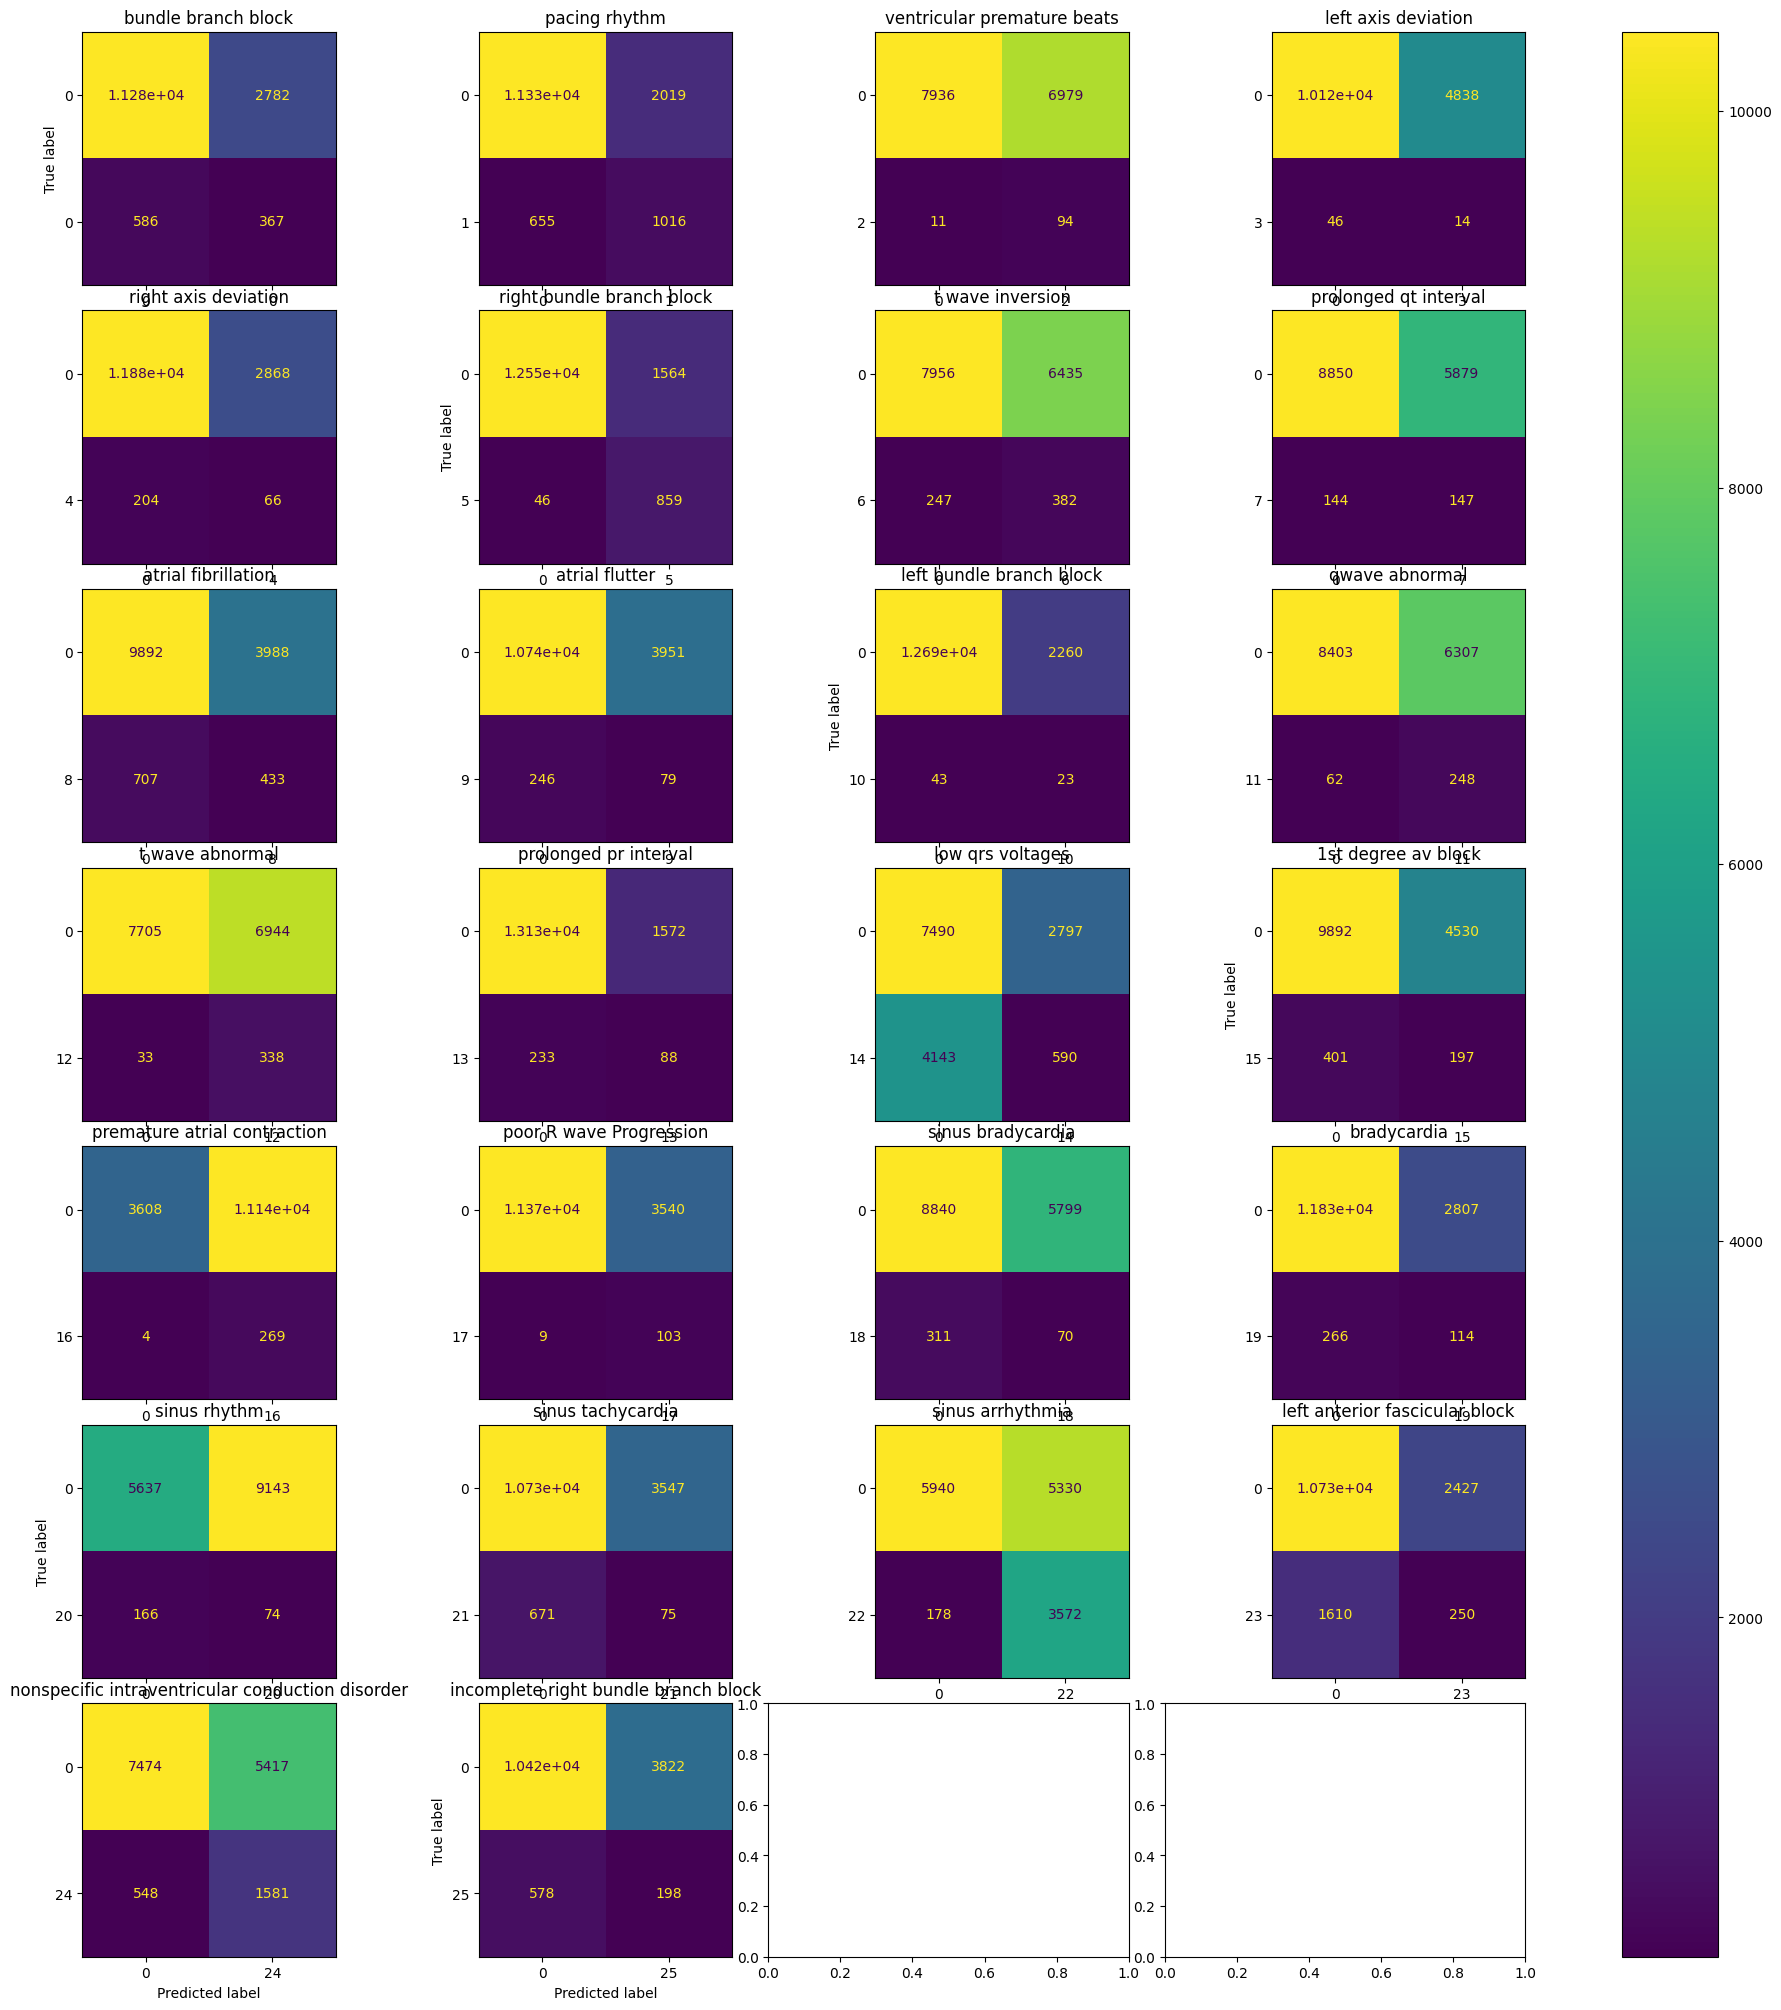

              precision    recall  f1-score   support

           0       0.12      0.39      0.18       953
           1       0.33      0.61      0.43      1671
           2       0.01      0.90      0.03       105
           3       0.00      0.23      0.01        60
           4       0.02      0.24      0.04       270
           5       0.35      0.95      0.52       905
           6       0.06      0.61      0.10       629
           7       0.02      0.51      0.05       291
           8       0.10      0.38      0.16      1140
           9       0.02      0.24      0.04       325
          10       0.01      0.35      0.02        66
          11       0.04      0.80      0.07       310
          12       0.05      0.91      0.09       371
          13       0.05      0.27      0.09       321
          14       0.17      0.12      0.15      4733
          15       0.04      0.33      0.07       598
          16       0.02      0.99      0.05       273
          17       0.03    

/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
matrix = multilabel_confusion_matrix(loaded['labels'], loaded['binary_outputs'])
classes = loaded['c'][0]
classes_words = []
for c in classes:
    cint = int(c)
    if cint in labels_to_class:
        classes_words.append(labels_to_class[cint])

f, axes = plt.subplots(7, 4, figsize=(25, 25))
axes = axes.ravel()
for i in range(26):
    disp = ConfusionMatrixDisplay(matrix[i],
                                  display_labels=[0, i])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'{classes_words[i]}')
    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

print(classification_report(loaded['labels'], loaded['binary_outputs']))

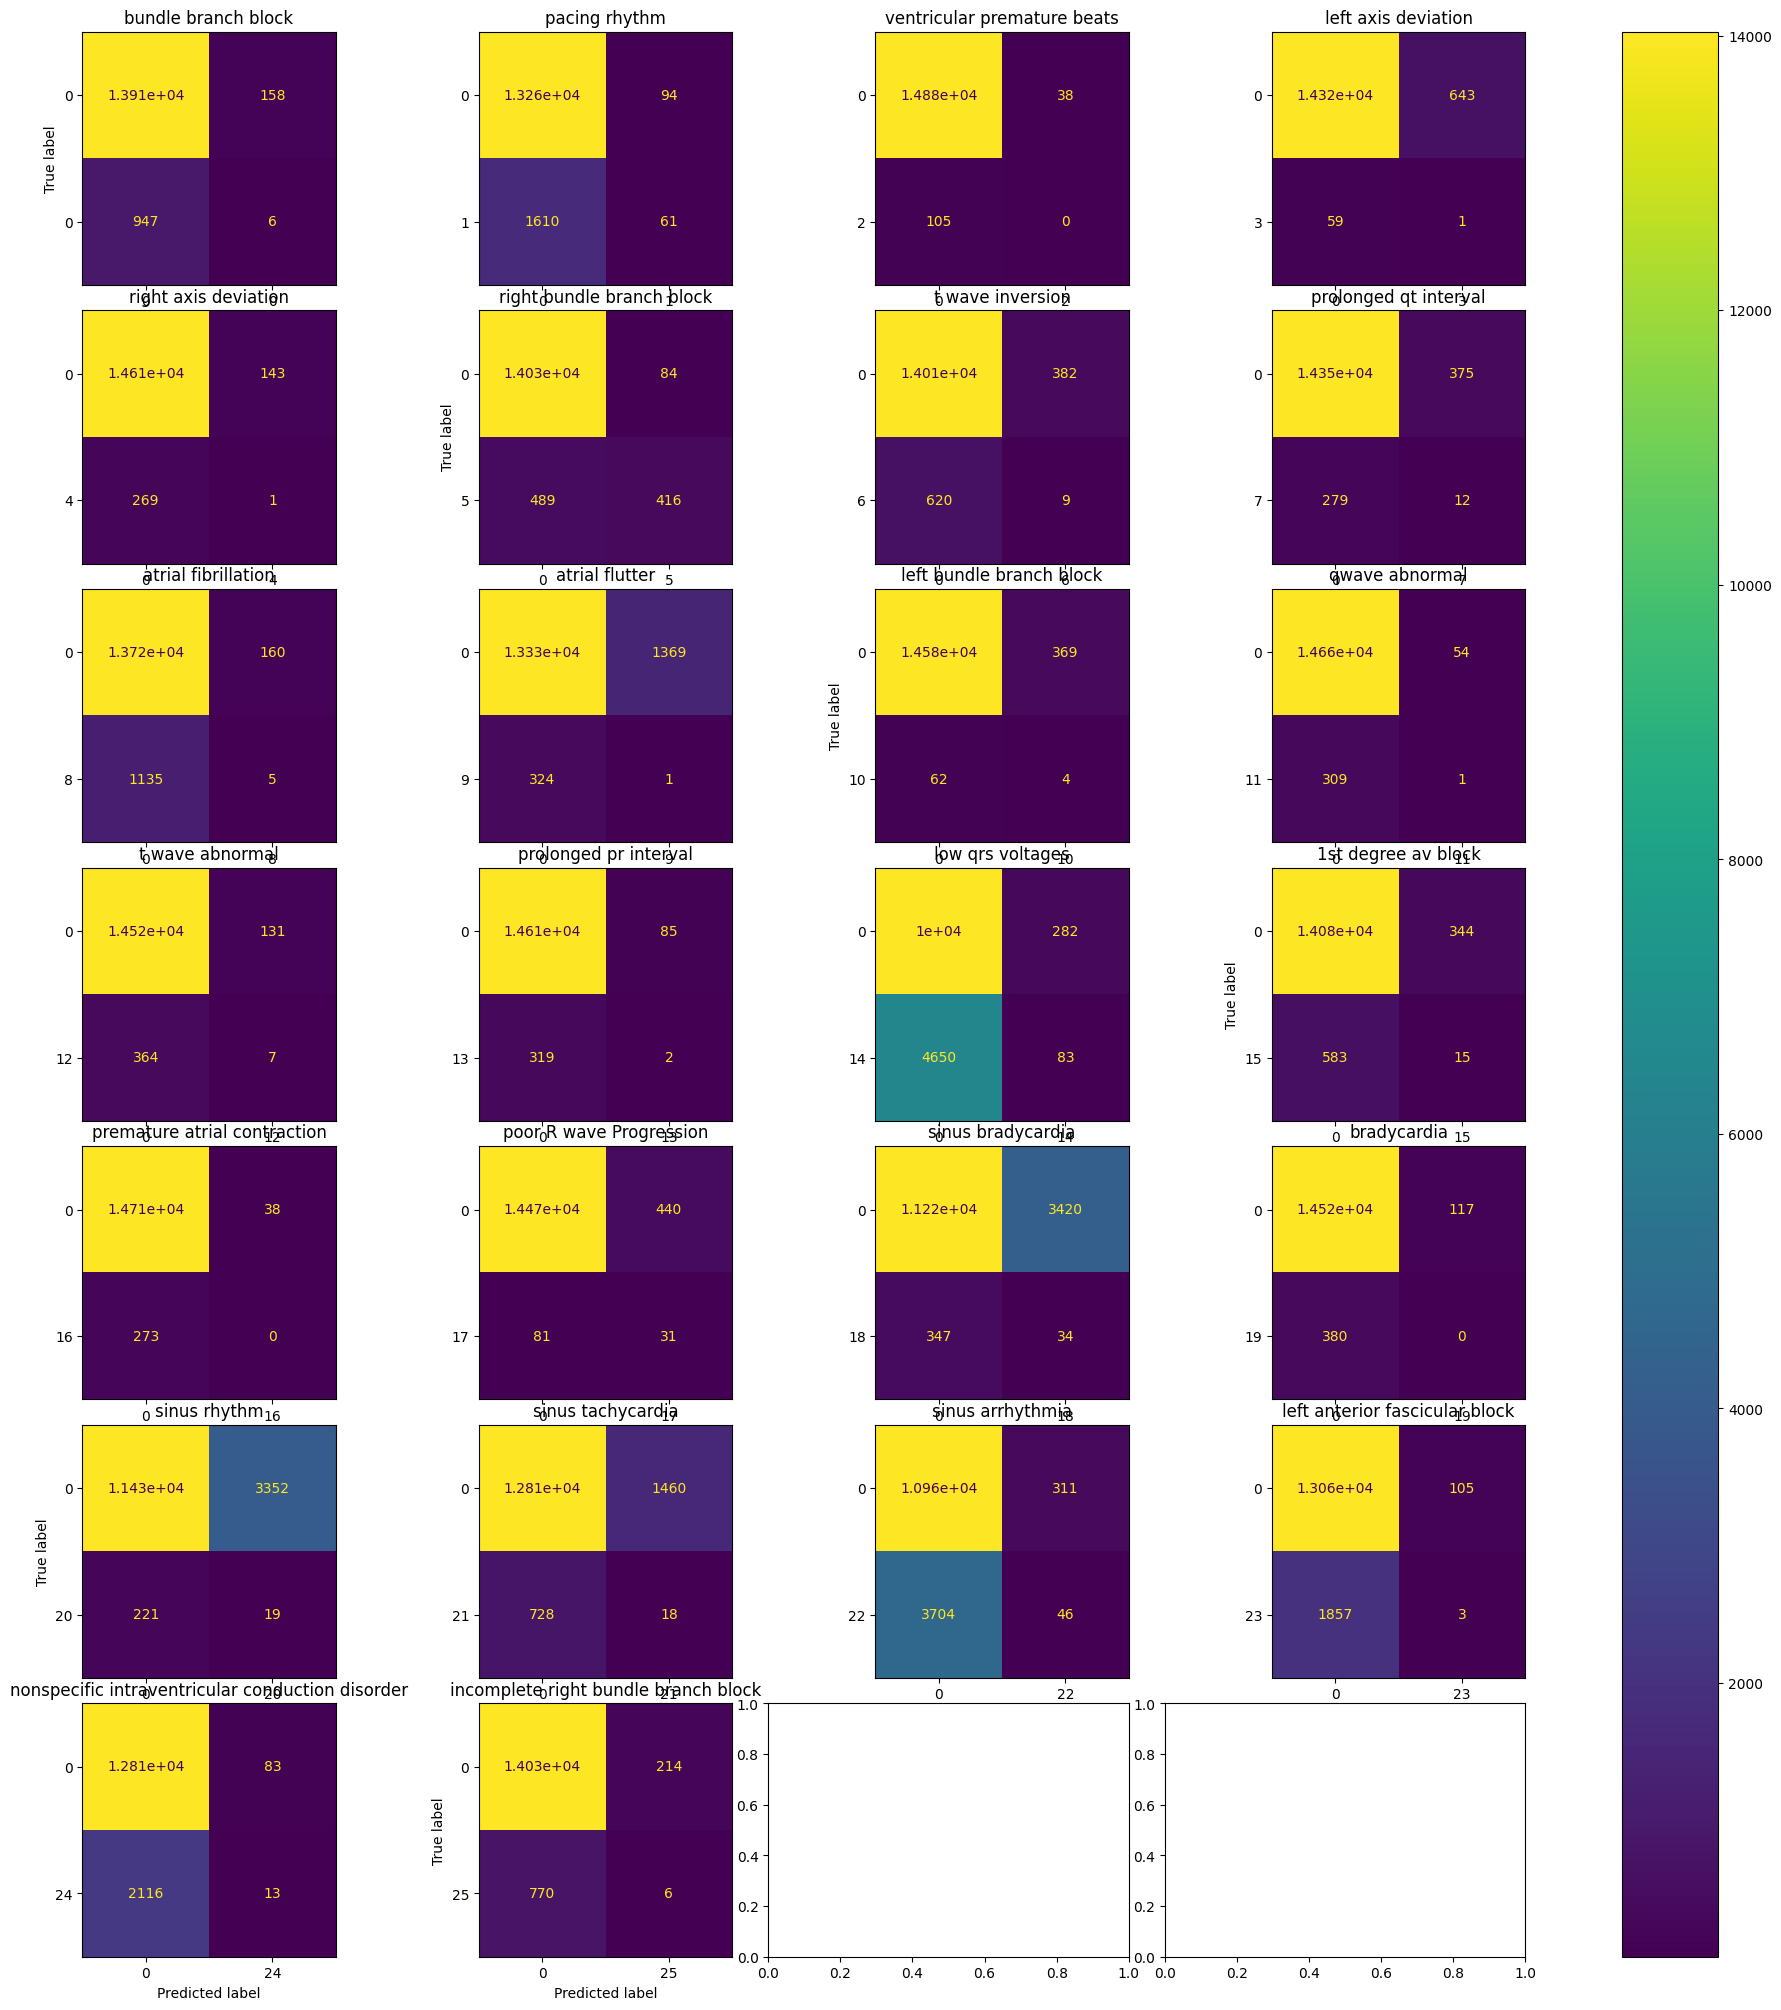

              precision    recall  f1-score   support

           0       0.04      0.01      0.01       953
           1       0.39      0.04      0.07      1671
           2       0.00      0.00      0.00       105
           3       0.00      0.02      0.00        60
           4       0.01      0.00      0.00       270
           5       0.83      0.46      0.59       905
           6       0.02      0.01      0.02       629
           7       0.03      0.04      0.04       291
           8       0.03      0.00      0.01      1140
           9       0.00      0.00      0.00       325
          10       0.01      0.06      0.02        66
          11       0.02      0.00      0.01       310
          12       0.05      0.02      0.03       371
          13       0.02      0.01      0.01       321
          14       0.23      0.02      0.03      4733
          15       0.04      0.03      0.03       598
          16       0.00      0.00      0.00       273
          17       0.07    

In [71]:
loaded_np = np.array(loaded['scalar_outputs'])
y_pred = loaded_np.max(axis=1,keepdims=1) == loaded_np


matrix = multilabel_confusion_matrix(loaded['labels'], y_pred)
classes = loaded['c'][0]
classes_words = []
for c in classes:
    cint = int(c)
    if cint in labels_to_class:
        classes_words.append(labels_to_class[cint])

f, axes = plt.subplots(7, 4, figsize=(25, 25))
axes = axes.ravel()
for i in range(26):
    disp = ConfusionMatrixDisplay(matrix[i],
                                  display_labels=[0, i])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'{classes_words[i]}')
    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
print(classification_report(loaded['labels'], y_pred))